In [1]:
%matplotlib inline
import pandas as pd
import pickle

## Load results

In [2]:
with open('data/benchmark_metadata9.pkl', 'rb') as f:
    cols_full, cols_short, series = pickle.load(f)

In [3]:
series_names = series
# series_names = [
#     'Masked',
#     'Unmasked',
#     'Masked R',
#     'Unmasked R',
# ]
total_timess = {
   s: pd.read_csv(f'data/benchmark_{s}9.csv')
   for s in series 
}

## Raw results

In [4]:
from ipywidgets import interact

In [5]:
@interact
def _(series=series):
    return total_timess[series]

interactive(children=(Dropdown(description='series', options=('upfront_symbolic_masked', 'symbolic_masked', 'u…

## Comparison

In [6]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,upfront_symbolic_masked,symbolic_masked,upfront_masked,masked,upfront_symbolic_unmasked,symbolic_unmasked,upfront_unmasked,unmasked
Flow*,77.704968,78.083259,82.934898,87.898530,80.336791,78.870518,82.258631,79.551850
unpreconditioning,67.341991,0.000000,79.827351,0.000000,66.905820,0.000000,77.629671,0.000000
P,0.429924,6.771044,0.733038,9.285413,1.816989,21.243604,2.871566,28.578011
Q,24.689693,54.428931,1.026020,39.050409,115.969380,237.785437,6.497924,67.533209
G(P | G(Q)),25.222963,61.303555,1.853803,48.431379,117.882873,259.128790,9.463389,96.202800
tentative eval,0.000000,0.646078,0.000000,0.551518,0.000000,3.592893,0.000000,3.073284
eval,0.355882,0.617105,0.861222,2.556880,2.168163,2.413262,4.841570,3.833150
root detection,0.003451,0.013074,0.797187,1.996348,0.014270,0.037560,4.310877,5.651744
composing flowpipe,67.280956,13.728399,79.770174,43.084532,66.846721,58.222266,77.574421,83.307537
composing atomic,24.537746,45.798945,0.005266,0.008439,114.848310,193.635825,0.021429,0.028341


In [7]:
comparison.to_csv("data/comparison.csv")

In [8]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,upfront_symbolic_masked,symbolic_masked,upfront_masked,masked,upfront_symbolic_unmasked,symbolic_unmasked,upfront_unmasked,unmasked
Flow*,6.128411,6.354529,9.874528,9.268782,7.487796,3.511573,13.434711,6.431388
unpreconditioning,11.304419,0.000000,9.496213,0.000000,10.308306,0.000000,8.803023,0.000000
P,0.136969,0.899906,0.219288,0.537998,0.483645,1.180147,0.902946,5.143769
Q,5.142646,10.736365,0.315685,9.723008,9.597967,16.789163,2.277737,12.309421
G(P | G(Q)),5.258496,10.507098,0.520855,9.919677,9.746468,16.892002,2.310667,12.354546
tentative eval,0.000000,0.077886,0.000000,0.059509,0.000000,1.039487,0.000000,0.533257
eval,0.100771,0.073311,0.265614,0.700007,0.418216,0.144562,1.056408,0.592153
root detection,0.000544,0.007562,0.252357,0.423179,0.001538,0.007056,1.354637,1.621374
composing flowpipe,11.301934,2.187360,9.494566,8.810183,10.306308,2.584846,8.801869,10.132385
composing atomic,5.154223,8.534744,0.000780,0.001812,9.513050,15.153589,0.003580,0.002209


In [9]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose(copy=True)
comparison2

,P,Q
upfront_symbolic_masked,0.429924,24.689693
symbolic_masked,6.771044,54.428931
upfront_masked,0.733038,1.026020
masked,9.285413,39.050409
upfront_symbolic_unmasked,1.816989,115.969380
symbolic_unmasked,21.243604,237.785437
upfront_unmasked,2.871566,6.497924
unmasked,28.578011,67.533209


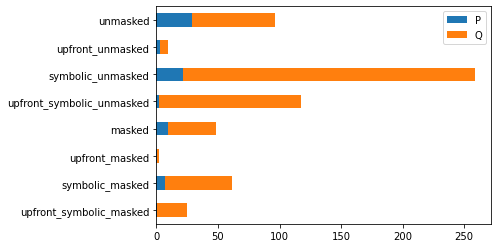

In [10]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [11]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib.pyplot as plt
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [12]:
p.get_figure().savefig('images/comparison-analysis-bar-chart-1.pdf')

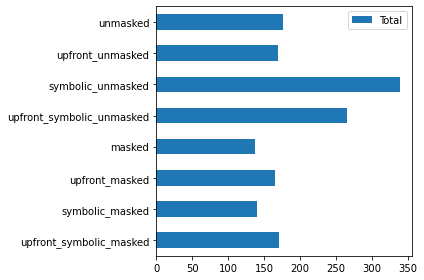

In [13]:
comparison3 = comparison.loc[['Total'],:].transpose(copy=True)
comparison3.plot(kind='barh')

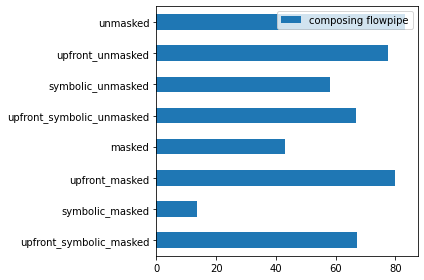

In [14]:
comparison_compo = comparison.loc[['composing flowpipe'],:].transpose(copy=True)
comparison_compo.plot(kind='barh')

In [15]:
_.get_figure().savefig('images/unpreconditioning_comparison.pdf')

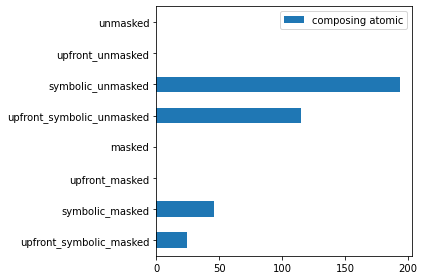

In [16]:
comparison_compo_atomic = comparison.loc[['composing atomic'],:].transpose(copy=True)
comparison_compo_atomic.plot(kind='barh')

In [17]:
_.get_figure().savefig('images/composing_atomic_comparison.pdf')

In [18]:
comparison5 = comparison.loc[['composing flowpipe'],:].transpose(copy=True)
comparison5

,composing flowpipe
upfront_symbolic_masked,67.280956
symbolic_masked,13.728399
upfront_masked,79.770174
masked,43.084532
upfront_symbolic_unmasked,66.846721
symbolic_unmasked,58.222266
upfront_unmasked,77.574421
unmasked,83.307537


In [44]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q', 'Total'],:].transpose(copy=True)
comparison4

,Flow*,P,Q,Total
upfront_symbolic_masked,77.704968,0.429924,24.689693,170.394933
symbolic_masked,78.083259,6.771044,54.428931,139.507228
upfront_masked,82.934898,0.733038,1.026020,164.759333
masked,87.898530,9.285413,39.050409,136.479671
upfront_symbolic_unmasked,80.336791,1.816989,115.969380,265.246118
symbolic_unmasked,78.870518,21.243604,237.785437,338.123532
upfront_unmasked,82.258631,2.871566,6.497924,169.491295
unmasked,79.551850,28.578011,67.533209,175.894812


In [45]:
upfront_cols = [s for s in series if 'upfront' in s]
upfront_cols

['upfront_symbolic_masked',
 'upfront_masked',
 'upfront_symbolic_unmasked',
 'upfront_unmasked']

In [46]:
comparison.loc[['unpreconditioning'], upfront_cols].transpose()

,unpreconditioning
upfront_symbolic_masked,67.341991
upfront_masked,79.827351
upfront_symbolic_unmasked,66.905820
upfront_unmasked,77.629671


In [171]:
comparison6 = comparison4.join(comparison.loc[['unpreconditioning'], upfront_cols].transpose(copy=True),
                               how='outer')
comparison6['unpreconditioning'].fillna(0, inplace=True)
cols = comparison6.columns.tolist()
print(cols)
cols = cols[:1] + cols[-1:] + cols[1:-1]
print(cols)
comparison6 = comparison6[cols]
comparison6

['Flow*', 'P', 'Q', 'Total', 'unpreconditioning']
['Flow*', 'unpreconditioning', 'P', 'Q', 'Total']


,Flow*,unpreconditioning,P,Q,Total
masked,87.898530,0.000000,9.285413,39.050409,136.479671
symbolic_masked,78.083259,0.000000,6.771044,54.428931,139.507228
symbolic_unmasked,78.870518,0.000000,21.243604,237.785437,338.123532
unmasked,79.551850,0.000000,28.578011,67.533209,175.894812
upfront_masked,82.934898,79.827351,0.733038,1.026020,164.759333
upfront_symbolic_masked,77.704968,67.341991,0.429924,24.689693,170.394933
upfront_symbolic_unmasked,80.336791,66.905820,1.816989,115.969380,265.246118
upfront_unmasked,82.258631,77.629671,2.871566,6.497924,169.491295


In [172]:
rearranged_colors = ('tab:blue', 'tab:red', 'tab:orange', 'tab:green')

In [173]:
p.get_figure().savefig('images/full-upfront-comparison.pdf')

In [334]:
chosen_rows, chosen_names = zip(*[
#    'upfront_unmasked',
#     ('upfront_unmasked', 'Unpreconditioning upfront'),
    ('upfront_symbolic_unmasked', 'Unpreconditioning upfront'),
#    'upfront_symbolic_unmasked',
    ('unmasked', 'Functional composition'),
#    'symbolic_unmasked',
    ('symbolic_unmasked', 'Unmasked'),
    ('symbolic_masked', 'Masked'),
#    'symbolic_masked_reversed',
#    'symbolic_masked_reversed',
])

In [175]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)  

In [176]:
comparison6[['Total']].sum(axis=1) 

masked                       136.479671
symbolic_masked              139.507228
symbolic_unmasked            338.123532
unmasked                     175.894812
upfront_masked               164.759333
upfront_symbolic_masked      170.394933
upfront_symbolic_unmasked    265.246118
upfront_unmasked             169.491295
dtype: float64

In [177]:
comparison6[cols[:-1]].sum(axis=1)

masked                       136.234352
symbolic_masked              139.283234
symbolic_unmasked            337.899559
unmasked                     175.663070
upfront_masked               164.521308
upfront_symbolic_masked      170.166576
upfront_symbolic_unmasked    265.028980
upfront_unmasked             169.257792
dtype: float64

In [178]:
comparison6.sum(axis=1)

masked                       272.714023
symbolic_masked              278.790462
symbolic_unmasked            676.023091
unmasked                     351.557882
upfront_masked               329.280640
upfront_symbolic_masked      340.561508
upfront_symbolic_unmasked    530.275099
upfront_unmasked             338.749087
dtype: float64

In [179]:
rem = comparison6[['Total']].sum(axis=1) - comparison6[cols[:-1]].sum(axis=1)
rem

masked                       0.245319
symbolic_masked              0.223994
symbolic_unmasked            0.223973
unmasked                     0.231742
upfront_masked               0.238025
upfront_symbolic_masked      0.228357
upfront_symbolic_unmasked    0.217138
upfront_unmasked             0.233503
dtype: float64

In [184]:
comparison7 = comparison6.copy()
comparison7.loc[:,'Remainder'] = rem
cols7 = comparison6.columns.tolist()
print(cols)
cols7 = cols7[:-2] + [cols7[-1], cols7[-2]]
print(cols)
comparison7 = comparison7[cols7]
comparison7

['Flow*', 'unpreconditioning', 'P', 'Q', 'Remainder', 'Total']
['Flow*', 'unpreconditioning', 'P', 'Q', 'Remainder', 'Total']


,Flow*,unpreconditioning,P,Q,Total,Remainder
masked,87.898530,0.000000,9.285413,39.050409,136.479671,0.245319
symbolic_masked,78.083259,0.000000,6.771044,54.428931,139.507228,0.223994
symbolic_unmasked,78.870518,0.000000,21.243604,237.785437,338.123532,0.223973
unmasked,79.551850,0.000000,28.578011,67.533209,175.894812,0.231742
upfront_masked,82.934898,79.827351,0.733038,1.026020,164.759333,0.238025
upfront_symbolic_masked,77.704968,67.341991,0.429924,24.689693,170.394933,0.228357
upfront_symbolic_unmasked,80.336791,66.905820,1.816989,115.969380,265.246118,0.217138
upfront_unmasked,82.258631,77.629671,2.871566,6.497924,169.491295,0.233503


In [203]:
comparison6['Total']['masked']

136.4796709423943

In [209]:
list(comparison6['Total'][reversed(chosen_rows)].items())

[('symbolic_masked', 139.50722794170142),
 ('symbolic_unmasked', 338.1235316839884),
 ('unmasked', 175.89481231110403),
 ('upfront_unmasked', 169.4912947925972)]

In [336]:
comp6_plot_data = comparison6.loc[reversed(chosen_rows),:][cols[:-2]].copy()
comp6_plot_data = comp6_plot_data.transpose()
comp6_plot_data.columns = reversed(chosen_names)
comp6_plot_data = comp6_plot_data.transpose()
comp6_plot_data

,Flow*,unpreconditioning,P,Q
Masked,78.083259,0.00000,6.771044,54.428931
Unmasked,78.870518,0.00000,21.243604,237.785437
Functional composition,79.551850,0.00000,28.578011,67.533209
Unpreconditioning upfront,80.336791,66.90582,1.816989,115.969380


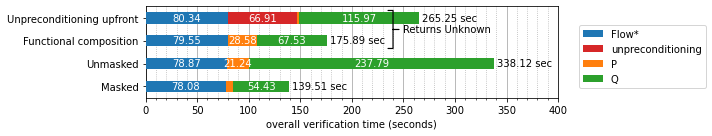

In [337]:
p = comp6_plot_data\
    .plot(kind='barh', stacked=True, grid=False,color=rearranged_colors, figsize=(10,2),
          zorder=3)
plt.legend(loc=(1.05, 0.105))
plt.xlabel('overall verification time (seconds)')
ax = plt.gca()
ax.set_xticks(np.arange(0, 401, 50))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.grid(True, zorder=0, linestyle='-', color='darkgrey', which='major')
ax.xaxis.grid(True, zorder=0, linestyle='dotted', which='minor')

labels = [
    f"{t:.2f} sec"
#     + ('' if 'symbolic' in row
#           else "\n (returned unknown)")
    for row, t in comparison6['Total'][reversed(chosen_rows)].items()
]

def anno_inner(p, label, color='black'):
    ax.annotate(
        label,
        xy=(p.get_x() + p.get_width()/2 ,
            p.get_y() + p.get_height()/2),
        xytext=(0, 0),
        textcoords="offset points",
        va='center', ha='center',
        color=color
    )

for i, p in enumerate(ax.patches):
    if p.get_width() > 10:
        col = ['Flow*', 'unpreconditioning', 'P', 'Q'][i // 4]
        anno_inner(p, f"{comparison6[col][chosen_rows[3-(i % 4)]]:.2f}", 'white')
        
for i, label in zip(ax.patches[-4:], labels):
    ax.annotate(
        label,
        xy=(i.get_x() + i.get_width(),
            i.get_y() + i.get_height()/2),
        xytext=(3, 0),
        textcoords="offset points",
        va='center', ha='left',
    )
    
plt.annotate(
    'Returns Unknown',
    xy=(238, 2.49),
    va='center', ha='left',
    xytext=(12,0),
    textcoords="offset points",
    arrowprops=dict(arrowstyle='-[, widthB=1.9, lengthB=0.5, angleB=60', lw=1.2),
)

plt.tight_layout()
plt.savefig('images/benchmark-bar-chart.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

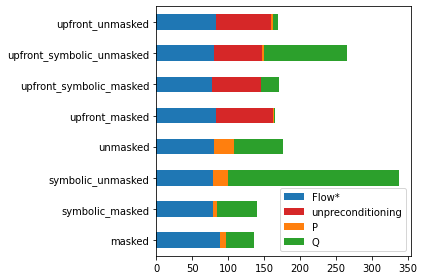

In [58]:
p = comparison6[cols[:-1]].plot(
                    kind='barh', stacked=True, grid=False,
                     color=rearranged_colors)
p

In [28]:
comparison.loc[:,chosen_columns]

,upfront_unmasked,unmasked,symbolic_unmasked,symbolic_masked
Flow*,82.258631,79.551850,78.870518,78.083259
unpreconditioning,77.629671,0.000000,0.000000,0.000000
P,2.871566,28.578011,21.243604,6.771044
Q,6.497924,67.533209,237.785437,54.428931
G(P | G(Q)),9.463389,96.202800,259.128790,61.303555
tentative eval,0.000000,3.073284,3.592893,0.646078
eval,4.841570,3.833150,2.413262,0.617105
root detection,4.310877,5.651744,0.037560,0.013074
composing flowpipe,77.574421,83.307537,58.222266,13.728399
composing atomic,0.021429,0.028341,193.635825,45.798945


In [29]:
p.get_figure().savefig('images/comparison-analysis7-bar-chart-2.pdf')

In [30]:
comparison5 = comparison6.copy()

In [31]:
comparison.loc[['Flow*', 'G(P | G(Q))'], :].transpose()

,Flow*,G(P | G(Q))
upfront_symbolic_masked,77.704968,25.222963
symbolic_masked,78.083259,61.303555
upfront_masked,82.934898,1.853803
masked,87.898530,48.431379
upfront_symbolic_unmasked,80.336791,117.882873
symbolic_unmasked,78.870518,259.128790
upfront_unmasked,82.258631,9.463389
unmasked,79.551850,96.202800


In [32]:
rem = comparison.loc[['Total'], :].transpose().sum(axis=1) - comparison6.sum(axis=1)
rem

masked                       0.245319
symbolic_masked              0.223994
symbolic_unmasked            0.223973
unmasked                     0.231742
upfront_masked               0.238025
upfront_symbolic_masked      0.228357
upfront_symbolic_unmasked    0.217138
upfront_unmasked             0.233503
dtype: float64

In [33]:
comparison6.loc[:,'Remainder'] = rem

In [34]:
comparison6

,Flow*,unpreconditioning,P,Q,Remainder
masked,87.898530,0.000000,9.285413,39.050409,0.245319
symbolic_masked,78.083259,0.000000,6.771044,54.428931,0.223994
symbolic_unmasked,78.870518,0.000000,21.243604,237.785437,0.223973
unmasked,79.551850,0.000000,28.578011,67.533209,0.231742
upfront_masked,82.934898,79.827351,0.733038,1.026020,0.238025
upfront_symbolic_masked,77.704968,67.341991,0.429924,24.689693,0.228357
upfront_symbolic_unmasked,80.336791,66.905820,1.816989,115.969380,0.217138
upfront_unmasked,82.258631,77.629671,2.871566,6.497924,0.233503


In [35]:
comparison5.to_csv("data/comparison-remainder-analysis.csv")

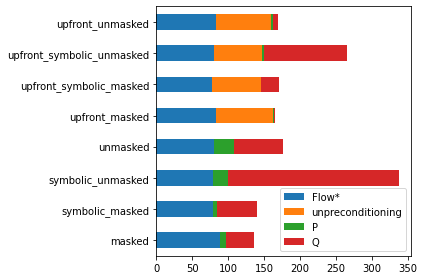

In [36]:
p = comparison5.plot(kind='barh', stacked=True, grid=False); p

In [37]:
p.get_figure().savefig(
    'images/key-comparison-analysis-bar-chart.pdf')

In [38]:
comparison6 = comparison.loc[['Flow*', 'P', 'Q', 'Total'], :].transpose()

In [39]:
comparison6

,Flow*,P,Q,Total
upfront_symbolic_masked,77.704968,0.429924,24.689693,170.394933
symbolic_masked,78.083259,6.771044,54.428931,139.507228
upfront_masked,82.934898,0.733038,1.026020,164.759333
masked,87.898530,9.285413,39.050409,136.479671
upfront_symbolic_unmasked,80.336791,1.816989,115.969380,265.246118
symbolic_unmasked,78.870518,21.243604,237.785437,338.123532
upfront_unmasked,82.258631,2.871566,6.497924,169.491295
unmasked,79.551850,28.578011,67.533209,175.894812


In [40]:
comparison6.to_csv('data/key-comparison-analysis.csv')

In [41]:
comparison3.loc['unmasked',:] / comparison3.loc['masked',:]

Total    1.288799
dtype: float64

In [42]:
comparison3.loc['unmasked_no_symbolic',:] / comparison3.loc['masked_no_symbolic',:]

KeyError: 'unmasked_no_symbolic'

In [ ]:
comparison3.loc['masked',:] / comparison3.loc['masked_no_symbolic',:]

In [ ]:
comparison3.loc['unmasked',:] / comparison3.loc['unmasked_no_symbolic',:]

In [ ]:
comparison3.loc['masked_symbolic_low_order',:] / comparison3.loc['masked_no_symbolic',:]